# Módulo Visualização de Dados:

Leia o arquivo ecommerce_preparados.csv’ dentro de um dataframe  

Faça uma análise detalhada dos dados, descubra quais dados gostaria de destacar e crie os seguintes gráficos:


*   1 Gráfico de dispersão
*   1 Mapa de calor
*   1 Gráfico de barra
*   1 Gráfico de pizza
*   1 Gráfico de densidade

Adicione títulos nos gráficos e nos eixos para ficar claro os objetivos dos gráficos.

Fiquem a vontade para escolher a biblioteca que quiserem, não esqueçam de comentar os códigos.

Essa atividade é um pouco diferente, vocês terão que construir os códigos nesse arquivo e enviar ou o arquivo ou o link do github com o arquivo publicado para os tutores.

Resumo Estatístico dos Dados:
        Unnamed: 0         Nota  N_Avaliações    Desconto        Preço  \
count  2199.000000  1559.000000   1559.000000  874.000000  1964.000000   
mean   1102.356526     4.560936    204.062219   15.457666   102.705713   
std     637.791961     0.362854    578.455265   10.929166    69.976425   
min       0.000000     2.300000      1.000000    5.000000    10.880000   
25%     549.500000     4.400000      8.000000    8.000000    50.192500   
50%    1103.000000     4.600000     27.000000   11.000000    78.970000   
75%    1654.500000     4.800000    119.500000   20.000000   139.152500   
max    2206.000000     5.000000   9077.000000   66.000000   597.300000   

       Nota_MinMax  N_Avaliações_MinMax  Desconto_MinMax  Preço_MinMax  \
count  1559.000000          1559.000000       874.000000   1964.000000   
mean      0.837384             0.022374         0.171437      0.156587   
std       0.134390             0.063735         0.179167      0.119328   
min    

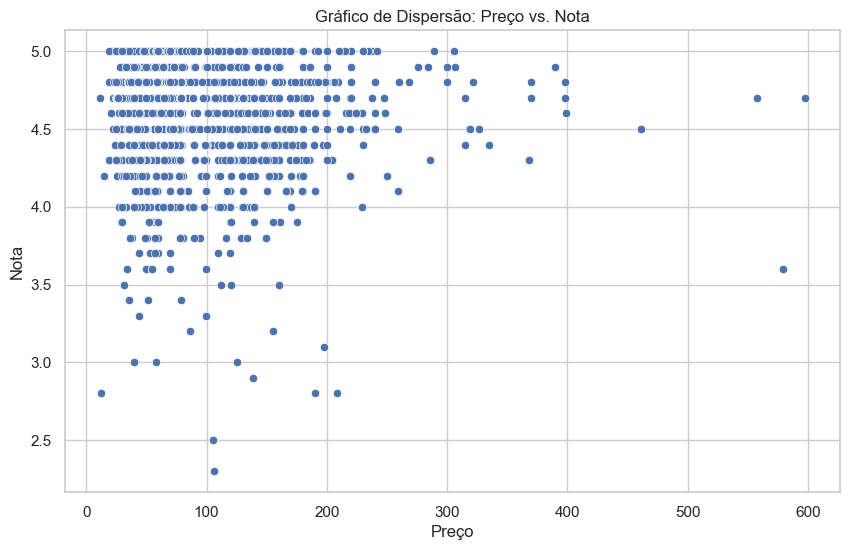

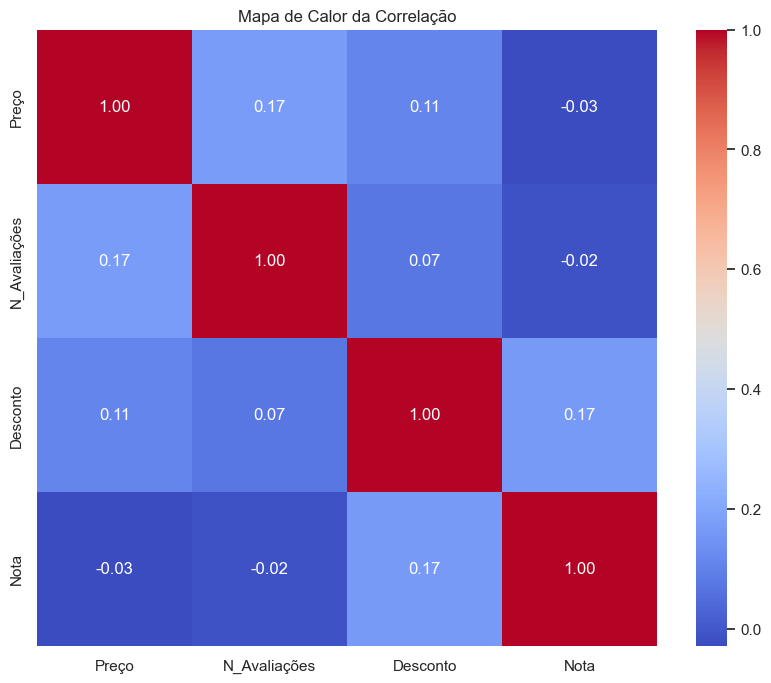

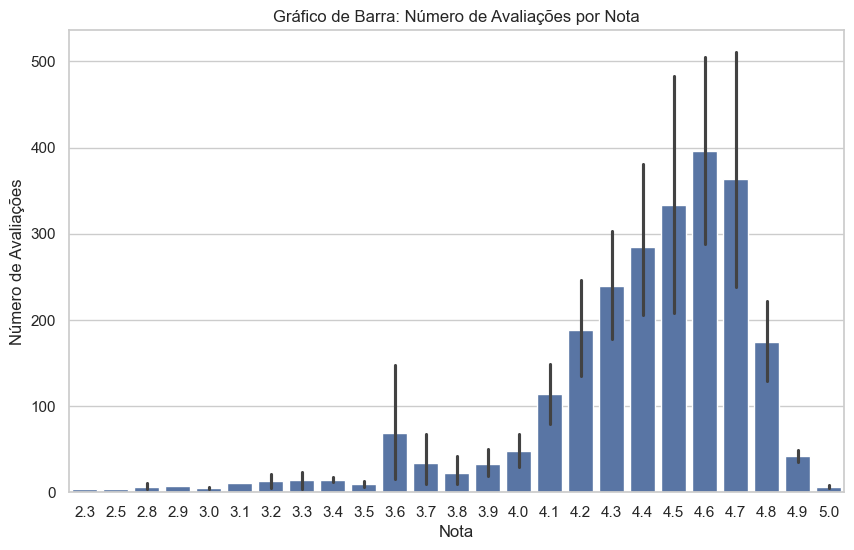

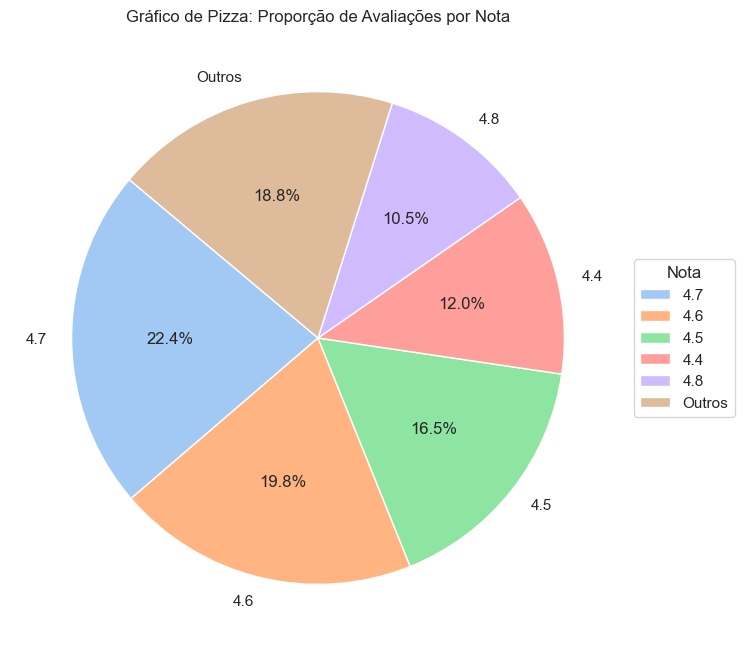

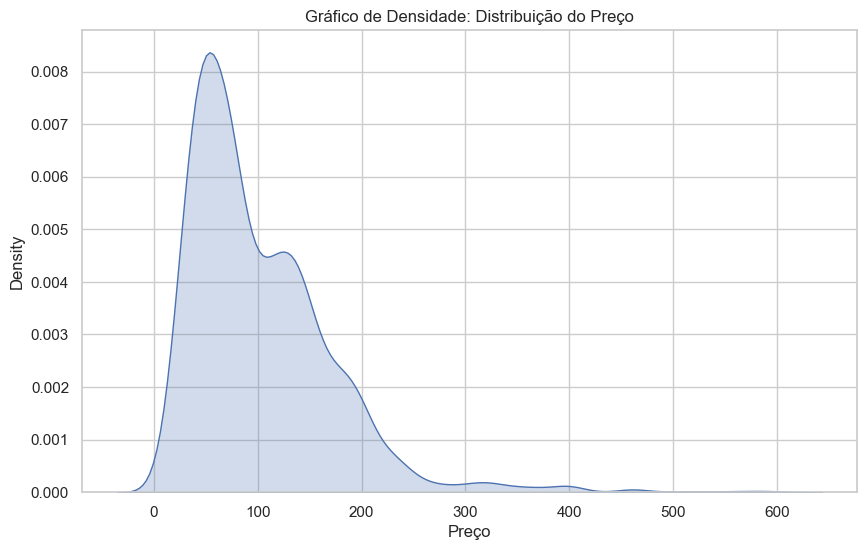

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Passo 1: Ler o arquivo CSV em um DataFrame
df = pd.read_csv('ecommerce_preparados.csv')

# Passo 2: Análise detalhada dos dados (opcional)
print("Resumo Estatístico dos Dados:")
print(df.describe())
print("\nInformações sobre os Dados:")
print(df.info())

# Passo 3: Criar gráficos

# Gráfico de Dispersão (Preço vs. Nota)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Preço', y='Nota')
plt.title('Gráfico de Dispersão: Preço vs. Nota')
plt.xlabel('Preço')
plt.ylabel('Nota')
plt.show()

# Mapa de Calor (Correlação entre variáveis numéricas)
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Preço', 'N_Avaliações', 'Desconto', 'Nota']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor da Correlação')
plt.show()

# Gráfico de Barra (Número de Avaliações por Nota)
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Nota', y='N_Avaliações')
plt.title('Gráfico de Barra: Número de Avaliações por Nota')
plt.xlabel('Nota')
plt.ylabel('Número de Avaliações')
plt.show()

# Gráfico de Pizza (Proporção de Avaliações por Nota com Agrupamento de Categorias Menores)
plt.figure(figsize=(10, 8))

# Agrupar 'N_Avaliações' por Nota
avaliacoes_por_nota = df.groupby('Nota')['N_Avaliações'].sum()

# Selecionar o número de categorias a serem destacadas
top_n = 5
# Obter as N maiores categorias
top_categorias = avaliacoes_por_nota.nlargest(top_n)
# Criar uma série com a soma das categorias menores como 'Outros'
outros = pd.Series([avaliacoes_por_nota.sum() - top_categorias.sum()], index=['Outros'])
# Concatenar as categorias principais com 'Outros'
outros = pd.concat([top_categorias, outros])

# Criar o gráfico de pizza
plt.pie(outros, labels=outros.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Gráfico de Pizza: Proporção de Avaliações por Nota')

# Adicionar uma legenda externa
plt.legend(outros.index, title='Nota', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

# Gráfico de Densidade (Distribuição do Preço)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Preço', fill=True)
plt.title('Gráfico de Densidade: Distribuição do Preço')
plt.xlabel('Preço')
plt.show()
